# ECSE 415 A1 Image Filtering 
Student Name: Irene Huang <br>
Student ID: 260740689

# 2 Denoising

In [463]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import math

#### 1. Filter the noisy image using a 5 × 5 Gaussian filter with variance equal to 2

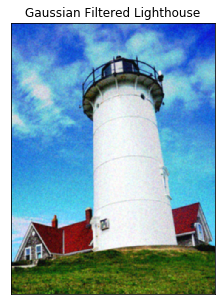

In [464]:
image_path = "./lighthouse.png"  # load image 
img = cv2.imread(image_path) 
# convert image from BGR to RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# show normal lighthouse image 
# plt.subplot(131), plt.imshow(img), plt.title('Lighthouse')
# plt.xticks([]), plt.yticks([])

# read gaussian lighthouse image 
image_path_gaussian = "./gaussian_lighthouse.png" 
img_gaussian = cv2.imread(image_path_gaussian) 

# Conversion
img_gaussian = cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB)

# filter image using 5x5 gaussian filter with variance = 2
img_gaussian_filter = cv2.GaussianBlur(img_gaussian, (5,5), math.sqrt(2))

# show gaussian lighthouse image after gaussian filter 
plt.figure(figsize=(5,5))
plt.imshow(img_gaussian_filter)
plt.title("Gaussian Filtered Lighthouse")
plt.xticks([]), plt.yticks([])

plt.show() 

#### 2. Filter the noisy image using a box filter of the same size

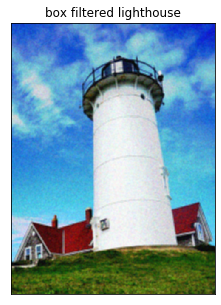

In [465]:
# create box filter 
boxFilter = np.ones((5,5), np.float32)/(5*5)

# filter image
img_box_filter = cv2.filter2D(img_gaussian, -1, boxFilter)

#display image 
plt.figure(figsize=(5,5))
plt.imshow(img_box_filter)
plt.title("box filtered lighthouse")
plt.xticks([]), plt.yticks([])
plt.show()


#### 3. Compare the PSNR of both of the denoised images to that of the clean image and state which method gives the superior result. (Use PSNR function provided by opencv)

PSNR is Peak Signal-to-Noise Ratio. It is the ratio between the max possible power of a signal and the power of corrupting nosise that affects the fidelity of its representation. 

In [466]:
# calculate PSNR
psnr_gaussian = cv2.PSNR(img, img_gaussian_filter)
psnr_box_filter = cv2.PSNR(img, img_box_filter)

print ("PSNR of Gaussian Filtered lighthouse: ", psnr_gaussian)
print ("PSNR of box filtered lighthouse:  ", psnr_box_filter)


PSNR of Gaussian Filtered lighthouse:  26.12002608453411
PSNR of box filtered lighthouse:   24.888900237114374


A higher PSNR indicates that the reconstruction is better. The previous results show that the Gaussian Filtering has a higher PSNR, and thus it gives a superior result. 

#### 4. Filter the noisy image（salt and pepper)  using the same Gaussian filter as used in the previous question

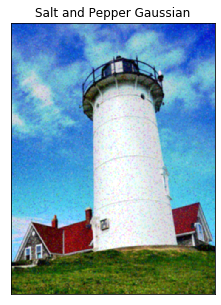

In [467]:
img_path_salt = "./saltandpepper_lighthouse.png"
img_salt = cv2.imread(img_path_salt) 
img_salt = cv2.cvtColor(img_salt, cv2.COLOR_BGR2RGB)

# Gaussian filter 
img_salt_gaussian = cv2.GaussianBlur(img_salt, (5,5), math.sqrt(2))

# Display Image 
plt.figure(figsize=(5,5))
plt.imshow(img_salt_gaussian)
plt.title("Salt and Pepper Gaussian")
plt.xticks([]), plt.yticks([])
plt.show()


 #### 5. Filter the noisy image using a median filter of the same size.

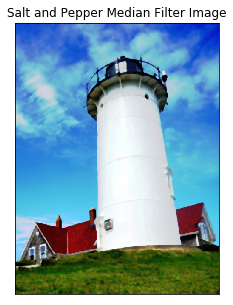

In [468]:
# Median filter 5x5
img_salt_median = cv2.medianBlur(img_salt, 5)

# Display Image 
plt.figure(figsize=(5,5))
plt.imshow(img_salt_median), plt.title("Salt and Pepper Median Filter Image")
plt.xticks([]), plt.yticks([])
plt.show()


#### 6. Compare the PSNR of both of the denoised images to that of the clean image and state which method gives a better result.

In [469]:
# Calculate PSNR 
psnr_salt_gaussian = cv2.PSNR(img, img_salt_gaussian)
psnr_salt_median = cv2.PSNR(img, img_salt_median)

print ("PSNR of Gaussian Filtered lighthouse: ", psnr_salt_gaussian)
print ("PSNR of Median Filtered lighthouse: ", psnr_salt_median)


PSNR of Gaussian Filtered lighthouse:  25.268752608147924
PSNR of Median Filtered lighthouse:  26.843612368248806


From the result, the PSNR of image using the median filter is higher, and thus the median filter gives a better result. 

# 3 Sobel Edge Detector

In [470]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import math

#### 1. Apply a Sobel edge detector with the filter size of 3×3, 5×5 and 7×7 to the image. Threshold the filtered image to detect edges. Use two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image. 

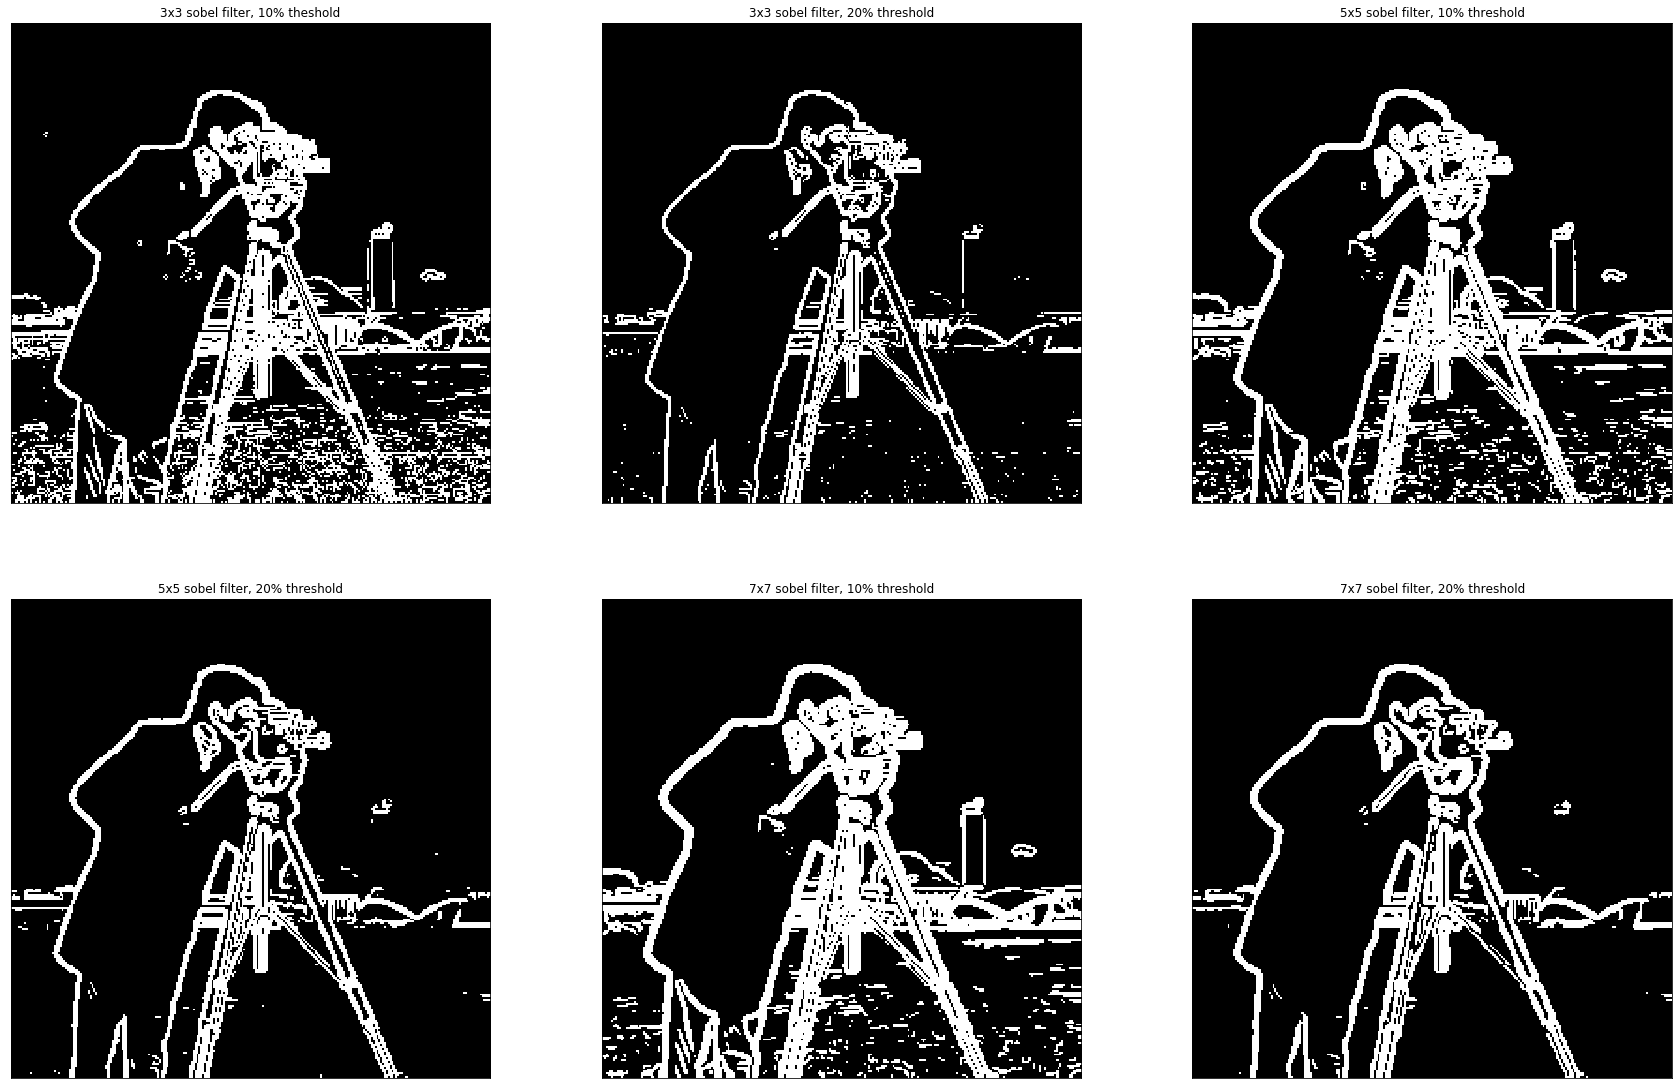

In [471]:
# load cameraman image 
img = cv2.imread("./cameraman.png")

# convert image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# sobel filter 3 x 3 for x and y 
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3) #kernel size = 3
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3) 

# calculate magnitude 
sobel = cv2.magnitude(sobelx, sobely) 

# find max pixel value 
maxValue = np.max(sobel)

# apply threshold 10% and 20% of the max pixel value 
(ret, threshold10)= cv2.threshold(sobel, maxValue * 0.1, 255, cv2.THRESH_BINARY)
(ret, threshold20)= cv2.threshold(sobel, maxValue * 0.2, 255, cv2.THRESH_BINARY)
# cv2.THRESH_TOZERO can also change to cv2.THRESH_BINARY


# sobel filter 5x5 
sobelx_5 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
sobely_5 = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)
sobel_5 = cv2.magnitude(sobelx_5, sobely_5)
maxValue_5 = np.max(sobel_5)
(ret, threshold10_5) = cv2.threshold(sobel_5, maxValue_5 * 0.1, 255, cv2.THRESH_BINARY)
(ret, threshold20_5) = cv2.threshold(sobel_5, maxValue_5 * 0.2, 255, cv2.THRESH_BINARY)

# sobel filter 7x7
sobelx_7 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 7)
sobely_7 = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 7)
sobel_7 = cv2.magnitude(sobelx_7, sobely_7)
maxValue_7 = np.max(sobel_7)
(ret, threshold10_7) = cv2.threshold(sobel_7, maxValue_7*0.1, 255, cv2.THRESH_BINARY)
(ret, threshold20_7) = cv2.threshold(sobel_7, maxValue_7*0.2, 255, cv2.THRESH_BINARY)

# display 3x3 filtered images 
plt.figure(figsize = (30, 30))
# plt.subplot(331), plt.imshow(img, cmap = 'gray')
# plt.title("Cameraman"), plt.xticks([]), plt.yticks([])
plt.subplot(331), plt.imshow(threshold10, cmap = 'gray')
plt.title("3x3 sobel filter, 10% theshold"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(threshold20, cmap = 'gray')
plt.title("3x3 sobel filter, 20% threshold"), plt.xticks([]), plt.yticks([])

# display 5x5 filtered images
plt.subplot(333), plt.imshow(threshold10_5, cmap = "gray")
plt.title("5x5 sobel filter, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(threshold20_5, cmap = "gray")
plt.title("5x5 sobel filter, 20% threshold"), plt.xticks([]), plt.yticks([])

# display 7x7 filtered images
plt.subplot(335), plt.imshow(threshold10_7, cmap = "gray")
plt.title("7x7 sobel filter, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(threshold20_7, cmap = "gray")
plt.title("7x7 sobel filter, 20% threshold"), plt.xticks([]), plt.yticks([])
plt.show()



#### 2. Comment on the effect of filter size on the output

Based on the images output, we can see that the edges are thicker by using a larger filter size. Also, less edges in the background are picked up by using larger filter size. This is because the bigger filter size takes account more pixels around the scene. It could overlook at the features and skip details in an image. A smaller filter size tends to provide more information, but it could also pick up more noise at the background. 

#### 3. Apply a Sobel edge detector with the filter size of 3 × 3. Threshold the filtered image to detect edges. Use two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image. 

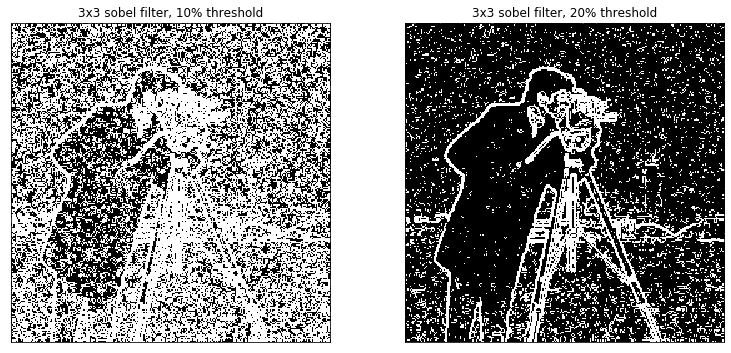

In [472]:
img_gaussian = cv2.imread("./gaussian_cameraman.png")

img_gaussian = cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2GRAY)

# sobel filter 3 x 3
sobelx_gaussian = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize = 3) #kernel size = 3
sobely_gaussian = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize = 3) 

# calculate magnitude 
sobel_gaussian = cv2.magnitude(sobelx_gaussian, sobely_gaussian) 

# find max pixel value 
maxValue_gaussian = np.max(sobel_gaussian)

# apply threshold 10% and 20% of the max pixel value 
(ret, threshold10_gaussian)= cv2.threshold(sobel_gaussian, maxValue_gaussian * 0.1, 255, cv2.THRESH_BINARY)
(ret, threshold20_gaussian)= cv2.threshold(sobel_gaussian, maxValue_gaussian * 0.2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize = (20, 20))
plt.subplot(331), plt.imshow(threshold10_gaussian, cmap = 'gray')
plt.title("3x3 sobel filter, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(threshold20_gaussian, cmap = 'gray')
plt.title("3x3 sobel filter, 20% threshold"), plt.xticks([]), plt.yticks([])
plt.show()


#### 4. Denoise the image with a 3 × 3 box filter and then apply a Sobel edge detector. Use the same values of the thresholds from the previous question.

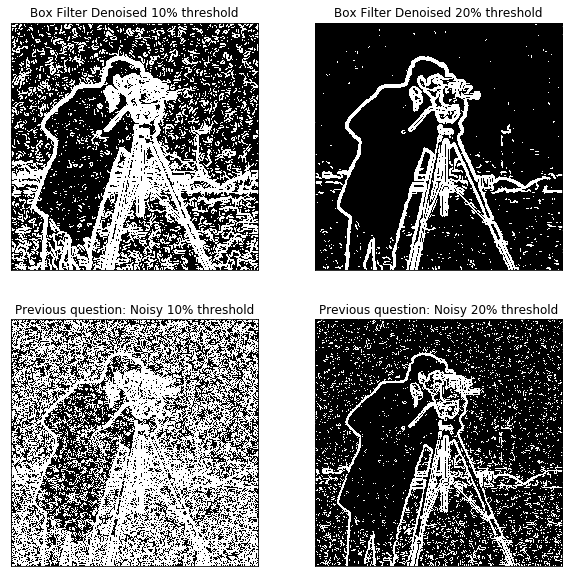

In [473]:
# create box filter 
boxFilter = np.ones((3,3), np.float32)/(3*3)

# filter image using box filter 
img_gaussian_boxfilter = cv2.filter2D(img_gaussian, -1, boxFilter)

# Apply 3x3 sobel filter 
sobelx_gaussian_box = cv2.Sobel(img_gaussian_boxfilter, cv2.CV_64F, 1, 0, ksize = 3)
sobely_gaussian_box = cv2.Sobel(img_gaussian_boxfilter, cv2.CV_64F, 0, 1, ksize = 3)
sobel_gaussian_box = cv2.magnitude(sobelx_gaussian_box, sobely_gaussian_box)

# find max pixel value 
maxValue_gaussian_box = np.max(sobel_gaussian_box)

# apply threshold 10% and 20% of the max pixel value 
(ret, thresh_10_gaussian_box) = cv2.threshold(sobel_gaussian_box, maxValue_gaussian_box*0.1, 255, cv2.THRESH_BINARY)
(ret, thresh_20_gaussian_box) = cv2.threshold(sobel_gaussian_box, maxValue_gaussian_box*0.2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(10,10))

plt.subplot(221), plt.imshow(thresh_10_gaussian_box, cmap='gray')
plt.title("Box Filter Denoised 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(thresh_20_gaussian_box, cmap='gray')
plt.title("Box Filter Denoised 20% threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(threshold10_gaussian, cmap = 'gray')
plt.title("Previous question: Noisy 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(threshold20_gaussian, cmap = 'gray')
plt.title("Previous question: Noisy 20% threshold"), plt.xticks([]), plt.yticks([])
plt.show()


#### 5. Comment on the effectiveness of using denoising prior to edge detection.

The images above show that using denoising prior to sobel edge detection improves the result of the image -- less noise is displayed on the image. However, the images also blur out by applying box filter. This is because each pixel is replaced with an average of its neighborhood, and this can reduce the magnitude of sharp transitions. 

Without denoising, the first two images pick up more edges. This is due to the fact that noise can cause changes in pixel values and thus more edges are displayed on the image.


# 4 Laplacian of Gaussian

In [474]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import math

#### 1. Filter the image using a 5 × 5 Laplacian of Gaussian kernel.

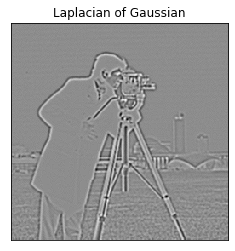

In [475]:
# load image as graysclae
img_camera = cv2.imread("./cameraman.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Filter 
image_camera_gaussian = cv2.GaussianBlur(img_camera, (5,5), 0)

# Apply Laplacian operator 
image_camera_LoG = cv2.Laplacian(image_camera_gaussian, cv2.CV_64F)

# Display Image
plt.imshow(image_camera_LoG, cmap = 'gray'), plt.title("Laplacian of Gaussian")
plt.xticks([]), plt.yticks([])
plt.show()

#### 2. Write your own code to detect edges in the above result. Recall that the zero-crossings in the filtered image indicate edges.

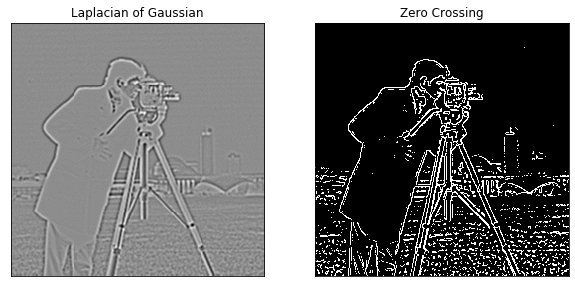

In [476]:
# Add padding 
image_padding = cv2.copyMakeBorder(image_camera_LoG, 1,1,1,1,cv2.BORDER_CONSTANT)
width, height = image_padding.shape
# print(weight, height) # 258 258
# plt.imshow(image_padding, cmap = 'gray')

# create a placeholder for the output 
image_zero_crossing = np.zeros((height, width), dtype=np.uint8)

# Define threshold
threshold = np.absolute(image_padding).mean() * 0.8

for row in range(1, width - 1):
    for col in range(1, height - 1):
        # patch of size 3 
        patch = image_padding[row-1:row+2, col-1:col+2]
        pixel = image_padding[row, col]
        #get max and min value in the patch 
        maxpixel = patch.max()
        minpixel = patch.min()
        # check to see if zero crossing exists 
        if (pixel > 0): 
            zerocross = True if minpixel < 0 else False
        elif (pixel < 0): 
            zerocross = True if maxpixel > 0 else False
        elif (pixel == 0):
            zerocross = True
        if (pixel > threshold) and zerocross: 
            image_zero_crossing[row,col] = 255

# get rid of padding 
image_zero_crossing = image_zero_crossing[1:height-1, 1:width-1]

# Display Image 
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(image_camera_LoG, cmap = 'gray'), plt.title("Laplacian of Gaussian")
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_zero_crossing, cmap='gray')
plt.title("Zero Crossing"), plt.xticks([]), plt.yticks([])
plt.show()


# 5 Derivative of Gaussian

#### 1. Apply a 3 × 3 Sobel kernel in x and y direction separately to the Gaussian kernel. The resultant kernels are Derivative of Gaussian kernels.

In [477]:
import cv2
import numpy as np
temp = cv2.getGaussianKernel (7, -1)
Gauss = np.outer(temp, temp.transpose())

# 3x3 Sobel kernel in x and y 
sobel_x = cv2.Sobel(Gauss, cv2.CV_64F, 1, 0, ksize = 3)
sobel_y = cv2.Sobel(Gauss, cv2.CV_64F, 0, 1, ksize = 3)

#### Apply a Derivative of Gaussian kernel created above to the noisy image shown in Figure 2(b). Threshold the resultant image with two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image.

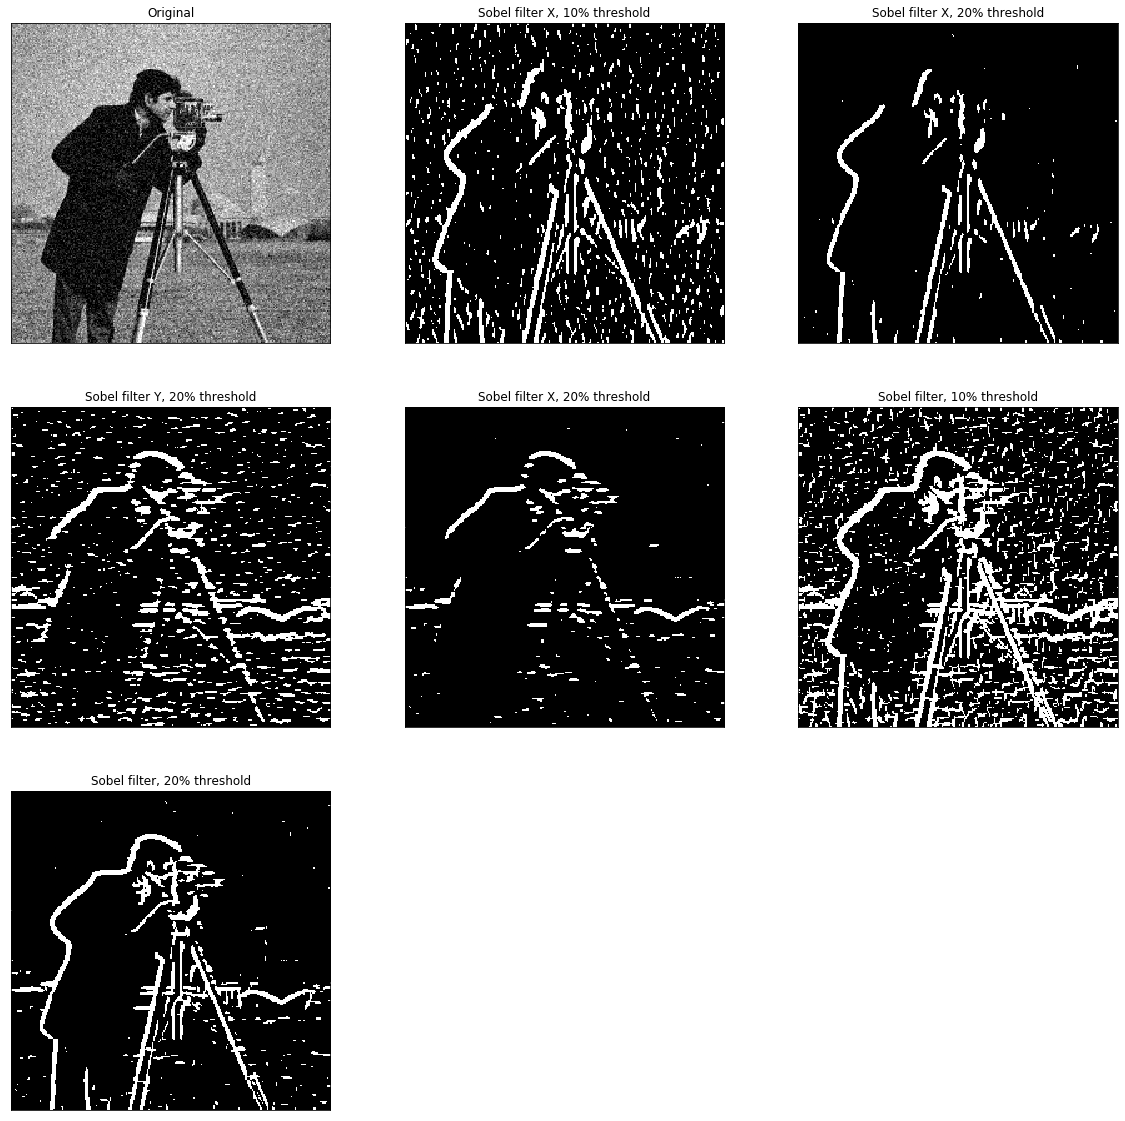

In [478]:
image_noisy_gaussian = cv2.imread("./gaussian_cameraman.png", cv2.IMREAD_GRAYSCALE)

# Filter the images 
image_gaussian_filteredX = cv2.filter2D(image_noisy_gaussian, -1, sobel_x)
image_gaussian_filteredY = cv2.filter2D(image_noisy_gaussian, -1, sobel_y)

# find max pixel value for x direction 
maxValue_x = np.max(image_gaussian_filteredX)
(ret, thresh_10_noisy_gaussianX) = cv2.threshold(image_gaussian_filteredX, maxValue_x*0.1, 255, cv2.THRESH_BINARY)
(ret, thresh_20_noisy_gaussianX) = cv2.threshold(image_gaussian_filteredX, maxValue_x*0.2, 255, cv2.THRESH_BINARY)

# find max pixel value for y direction 
maxValue_y = np.max(image_gaussian_filteredY)
(ret, thresh_10_noisy_gaussianY) = cv2.threshold(image_gaussian_filteredY, maxValue_y*0.1, 255, cv2.THRESH_BINARY)
(ret, thresh_20_noisy_gaussianY) = cv2.threshold(image_gaussian_filteredY, maxValue_y*0.2, 255, cv2.THRESH_BINARY)

# Calculate magnitude and normalize it 
image_gaussian_filtered10 = np.sqrt(np.square(thresh_10_noisy_gaussianX)+ np.square(thresh_10_noisy_gaussianY))
image_gaussian_filtered20 = np.sqrt(np.square(thresh_20_noisy_gaussianX)+ np.square(thresh_20_noisy_gaussianY))
# image_gaussian_filtered10 *= (255.0/image_gaussian_filtered10.max())
# image_gaussian_filtered20 *= (255.0/image_gaussian_filtered20.max())

image_gaussian_filtered10=image_gaussian_filtered10.astype('uint8')
image_gaussian_filtered20=image_gaussian_filtered20.astype('uint8')

# find max pixel value 
maxValue_noisy_gaussian = np.max(image_gaussian_filtered10)

# apply threshold 10% and 20% of the max pixel value 
(ret, thresh_10_noisy_gaussian) = cv2.threshold(image_gaussian_filtered10, maxValue_noisy_gaussian*0.1, 255, cv2.THRESH_BINARY)
(ret, thresh_20_noisy_gaussian) = cv2.threshold(image_gaussian_filtered20, maxValue_noisy_gaussian*0.2, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,20))
plt.subplot(331), plt.imshow(image_noisy_gaussian, cmap='gray')
plt.title("Original"), plt.xticks([]), plt.yticks([])

plt.subplot(332), plt.imshow(thresh_10_noisy_gaussianX, cmap='gray')
plt.title("Sobel filter X, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(thresh_20_noisy_gaussianX, cmap='gray')
plt.title("Sobel filter X, 20% threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(334), plt.imshow(thresh_10_noisy_gaussianY, cmap='gray')
plt.title("Sobel filter Y, 20% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(thresh_20_noisy_gaussianY, cmap='gray')
plt.title("Sobel filter X, 20% threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(336), plt.imshow(thresh_10_noisy_gaussian, cmap='gray')
plt.title("Sobel filter, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(thresh_20_noisy_gaussian, cmap='gray')
plt.title("Sobel filter, 20% threshold"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2. Denoise the same image with 5 × 5 Gaussian kernel. Apply 3 × 3 Sobel edge detector on the denoised image. Threshold the resultant image with two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image.

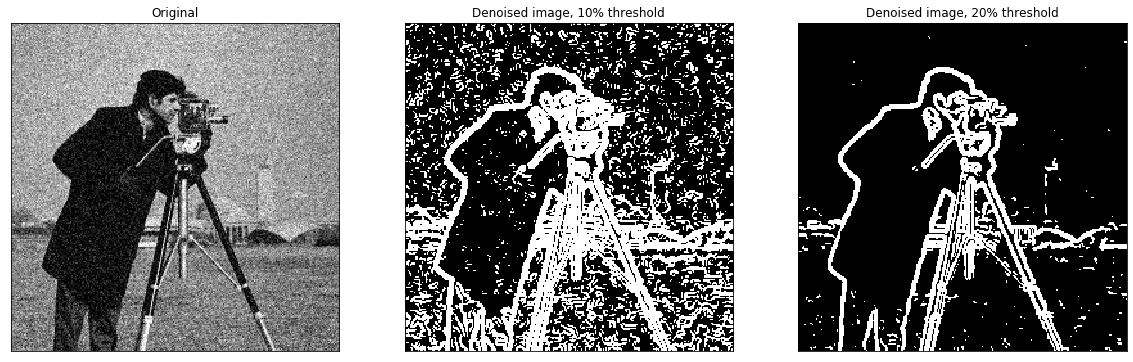

In [479]:
# Denoise image with 5x5 Gaussian Kernel
image_noisy_gaussianfilter = cv2.GaussianBlur(image_noisy_gaussian, (5,5),0)

# sobel filter 
sobel_x_denoise = cv2.Sobel(image_noisy_gaussianfilter, cv2.CV_64F, 1, 0, ksize = 3)
sobel_y_denoise = cv2.Sobel(image_noisy_gaussianfilter, cv2.CV_64F, 0, 1, ksize = 3)
sobel_denoise = cv2.magnitude(sobel_x_denoise, sobel_y_denoise)

# calculate max value 
maxvalue_denoise = np.max(sobel_denoise)

# apply threshold 
(ret, thresh_10_denoise) = cv2.threshold(sobel_denoise, maxvalue_denoise*0.1, 255, cv2.THRESH_BINARY)
(ret, thresh_20_denoise) = cv2.threshold(sobel_denoise, maxvalue_denoise*0.2, 255, cv2.THRESH_BINARY)

# display images 
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(image_noisy_gaussian, cmap='gray')
plt.title("Original"),plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh_10_denoise, cmap='gray')
plt.title("Denoised image, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thresh_20_denoise, cmap='gray')
plt.title("Denoised image, 20% threshold"), plt.xticks([]), plt.yticks([])
plt.show()

#### 3. Apply 3 × 3 Sobel edge detector on the original noisy image. Threshold the resultant image with two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image. 

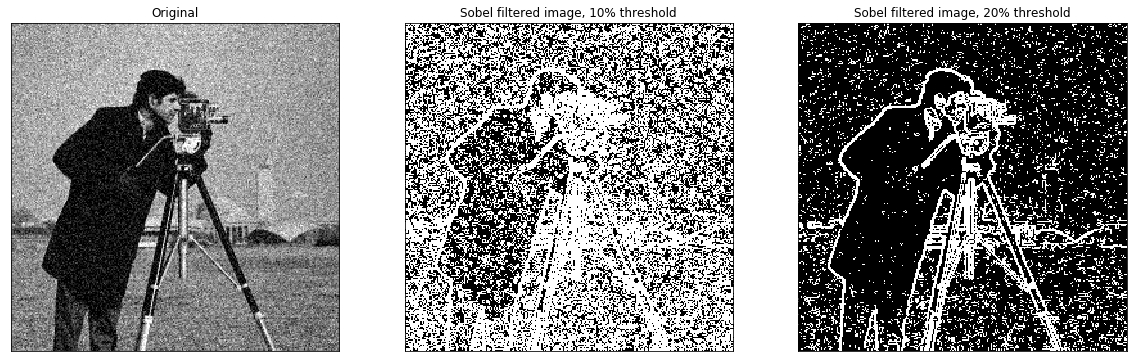

In [480]:
# Apply 3x3 sobel filter 
sobelx_filter = cv2.Sobel(image_noisy_gaussian, cv2.CV_64F, 1, 0, ksize = 3)
sobely_filter = cv2.Sobel(image_noisy_gaussian, cv2.CV_64F, 0, 1, ksize = 3)
sobel_filter = cv2.magnitude(sobelx_filter, sobely_filter)

# calculate max value 
maxvalue_sobel = np.max(sobel_filter)

# apply threshold 
(ret, thresh_10_sobel) = cv2.threshold(sobel_filter, maxvalue_sobel*0.1, 255, cv2.THRESH_BINARY)
(ret, thresh_20_sobel) = cv2.threshold(sobel_filter, maxvalue_sobel*0.2, 255, cv2.THRESH_BINARY)

# display images 
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(image_noisy_gaussian, cmap='gray')
plt.title("Original"),plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh_10_sobel, cmap='gray')
plt.title("Sobel filtered image, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thresh_20_sobel, cmap='gray')
plt.title("Sobel filtered image, 20% threshold"), plt.xticks([]), plt.yticks([])
plt.show()

#### 4. State your observations about the differences/similarities in the above three results. 

From the result above, we can observe that the image has less noise if the image is filtered by the gaussian filter prior to sobel filter. With a larger guassian filter, less noises are picked up at the background. From 5.1 and 5.2, we can observe that the larger the size of the gaussian filter, the thicker the edges become.  

# 6 Canny Edge Detection 

In [481]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import math

#### 1. Use canny edge detector to detect edges in ‘yellowlily’ image shown in Figure 3(a). Tune kernel size, lower and upper thresholds such that the final output is similar to the one shown in 3(b).

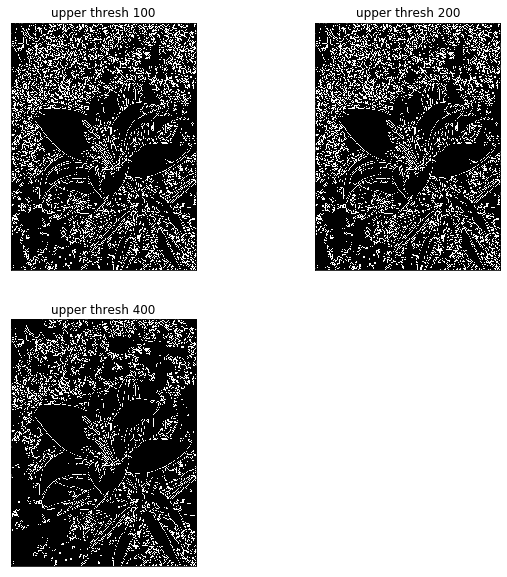

In [482]:
image_yellowlily = cv2.imread("./yellowlily.png", cv2.IMREAD_GRAYSCALE)

# give values to kernel size and thresholds
kernelsize = 3
lower_threshold = 10
upper_threshold = 100

# Apply Gaussian Filter 
# image_yl_gaussian = cv2.GaussianBlur(image_yellowlily, (kernelsize,kernelsize), 0)

# compute canny edges 
image_canny5 = cv2.Canny(image_yellowlily, lower_threshold, upper_threshold, apertureSize = kernelsize)
image_canny5_10_200 = cv2.Canny(image_yellowlily, lower_threshold, (upper_threshold+100), apertureSize = kernelsize)
image_canny5_10_400 = cv2.Canny(image_yellowlily, lower_threshold, (upper_threshold+300), apertureSize = kernelsize)

# Display Image 
plt.figure(figsize=(10,10))

plt.subplot(221), plt.imshow(image_canny5, cmap='gray'),
plt.title("upper thresh 100"), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(image_canny5_10_150, cmap='gray'),
plt.title("upper thresh 200"), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(image_canny5_10_200, cmap='gray'),
plt.title("upper thresh 400"), plt.xticks([]), plt.yticks([])
plt.show()

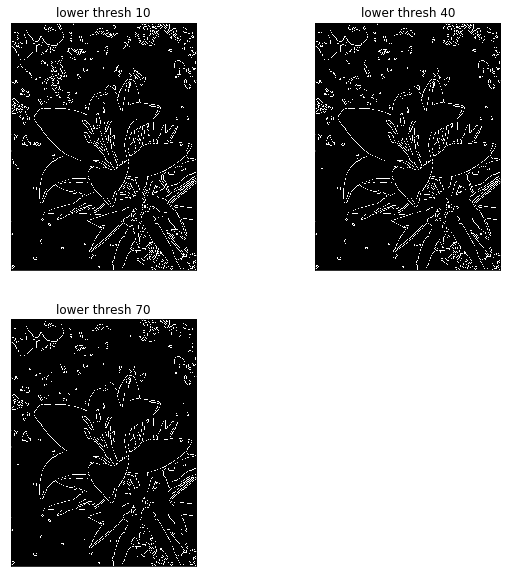

In [483]:
image_yellowlily = cv2.imread("./yellowlily.png", cv2.IMREAD_GRAYSCALE)

# give values to kernel size and thresholds
kernelsize = 3
lower_threshold = 10
upper_threshold = 100

# Apply Gaussian Filter 
# image_yl_gaussian = cv2.GaussianBlur(image_yellowlily, (kernelsize,kernelsize), 0)

# compute canny edges 
image_canny5_10_100 = cv2.Canny(image_yl_gaussian, lower_threshold, upper_threshold, apertureSize = kernelsize)
image_canny5_40_100 = cv2.Canny(image_yl_gaussian, lower_threshold+30, upper_threshold, apertureSize = kernelsize)
image_canny5_70_100 = cv2.Canny(image_yl_gaussian, lower_threshold+60, upper_threshold, apertureSize = kernelsize)

# Display Image 
plt.figure(figsize=(10,10))

plt.subplot(221), plt.imshow(image_canny5_10_100, cmap='gray'),
plt.title("lower thresh 10"), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(image_canny5_40_100, cmap='gray'),
plt.title("lower thresh 40"), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(image_canny5_70_100, cmap='gray'),
plt.title("lower thresh 70"), plt.xticks([]), plt.yticks([])
plt.show()

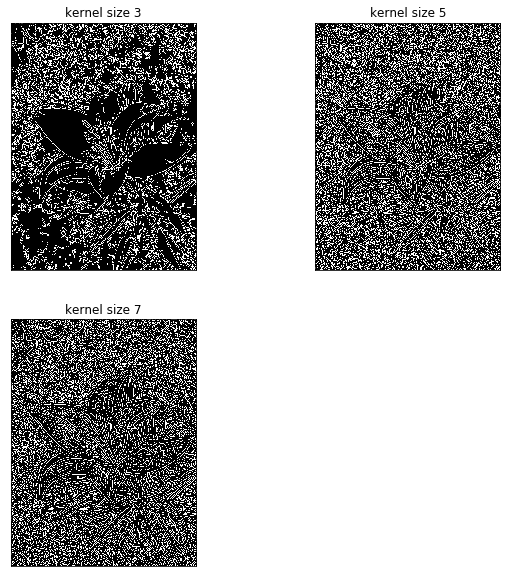

In [484]:
image_yellowlily = cv2.imread("./yellowlily.png", cv2.IMREAD_GRAYSCALE)

# give values to kernel size and thresholds
kernelsize = 3
lower_threshold = 10
upper_threshold = 100

# Apply Gaussian Filter 
# image_yl_gaussian5 = cv2.GaussianBlur(image_yellowlily, (kernelsize,kernelsize), 0)
# image_yl_gaussian9 = cv2.GaussianBlur(image_yellowlily, (kernelsize+4,kernelsize+4), 0)
# image_yl_gaussian13 = cv2.GaussianBlur(image_yellowlily, (kernelsize+8,kernelsize+8), 0)

# compute canny edges 
image_canny3_10_100 = cv2.Canny(image_yellowlily, lower_threshold, upper_threshold, apertureSize = kernelsize)
image_canny5_10_100 = cv2.Canny(image_yellowlily, lower_threshold, upper_threshold, apertureSize = kernelsize + 2)
image_canny7_10_100 = cv2.Canny(image_yellowlily, lower_threshold, upper_threshold, apertureSize = kernelsize + 4)

# Display Images
plt.figure(figsize=(10,10))

plt.subplot(221), plt.imshow(image_canny3_10_100, cmap='gray'),
plt.title("kernel size 3"), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(image_canny5_10_100, cmap='gray'),
plt.title("kernel size 5"), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(image_canny7_10_100, cmap='gray'),
plt.title("kernel size 7"), plt.xticks([]), plt.yticks([])
plt.show()

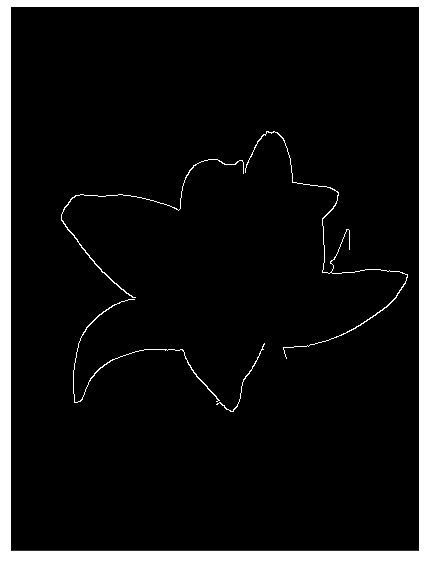

In [485]:
# blur image 
kernelsize = 3
lower_threshold = 300 
upper_threshold = 1000

# Apply Gaussian Filter 
# image_yl_gaussian = cv2.GaussianBlur(image_yellowlily, (kernelsize,kernelsize), 0)
# compute canny edges 
image_canny = cv2.Canny(image_yellowlily, lower_threshold, upper_threshold, apertureSize = kernelsize)


plt.figure(figsize=(10,10))
plt.imshow(image_canny, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
    

#### 2. Comment on how changing values of kernel size, lower and upper thresholds affect the overall edge detection.

From the images above, we can observe that changing the kernel size and the upper threshold have large effect on edge detection. More specifically, decreasing the kernel size and increasing the upper threshold both reduce noise in the background, and hence improve on edge detection. Changing the kernel size has the most significant effect on edge detection. Changing the lower threshold does not have a significant effect on edge detection comparing to the kernel size and upper threshold.

Based on the result, the kernel size should reduce and the upper threshold should increase to produce an image similar to Figure 3(b). After several iterations, I found the image is similar to the expected result when kernelsize is 3, lower threshold is 300, upper threshold is 1000. 